In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statistics
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/ My Drive/Colab_TA/Dataset21.csv", usecols=["Tanggal", "Kurs Jual"] )
df['Tanggal']= pd.to_datetime(df.Tanggal)
df

,Tanggal,Kurs Jual
0,2021-01-04,17126.12
1,2021-01-05,17191.87
2,2021-01-06,17196.43
3,2021-01-07,17260.28
4,2021-01-08,17318.46
...,...,...
251,2021-12-27,16202.12
252,2021-12-28,16174.64
253,2021-12-29,16202.59
254,2021-12-30,16182.85


In [ ]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Tanggal,Kurs Jual
0,2021-01-04,17126.12
1,2021-01-05,17191.87
2,2021-01-06,17196.43
3,2021-01-07,17260.28
4,2021-01-08,17318.46
5,2021-01-11,17324.15
6,2021-01-12,17369.97
7,2021-01-13,17324.57
8,2021-01-14,17226.17
9,2021-01-15,17176.67


# Visualisasi Data

Text(0, 0.5, 'Kurs Jual')

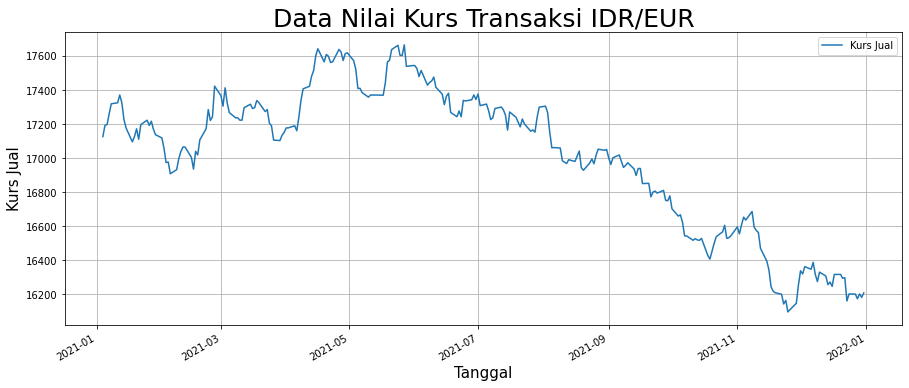

In [ ]:
df.plot(x='Tanggal', y='Kurs Jual', grid='True', figsize=(15,6))
plt.title('Data Nilai Kurs Transaksi IDR/EUR', fontsize = 25)
plt.xlabel('Tanggal', fontsize = 15)
plt.ylabel('Kurs Jual', fontsize = 15)

### Visualisasi Data (Per Bulan) 

In [ ]:
vis = px.line(df, x="Tanggal", y="Kurs Jual", title="Data Kurs Transaksi IDR/EUR")
vis.update_xaxes(dtick="M1", tickformat="%b\t%Y", ticklabelmode="period")
vis.update_layout(autosize=False, width=1600, height=850)
vis.show()

# Menentukan independent Variabel (X) and dependent Variabel (Y)

### Kurs Jual (Dataset ) 

In [ ]:
Kurs_Jual = np.array(df['Kurs Jual'])
Kurs_Jual = Kurs_Jual.reshape(-1,1)
print(Kurs_Jual)

[[17126.12]
 [17191.87]
 [17196.43]
 [17260.28]
 [17318.46]
 [17324.15]
 [17369.97]
 [17324.57]
 [17226.17]
 [17176.67]
 [17095.1 ]
 [17126.45]
 [17171.6 ]
 [17110.23]
 [17196.3 ]
 [17222.07]
 [17191.57]
 [17216.09]
 [17168.  ]
 [17136.76]
 [17118.11]
 [17057.03]
 [16973.53]
 [16976.79]
 [16907.9 ]
 [16931.84]
 [16995.15]
 [17038.04]
 [17064.84]
 [17064.84]
 [17003.88]
 [16935.45]
 [17039.36]
 [17018.74]
 [17106.84]
 [17172.21]
 [17284.4 ]
 [17220.72]
 [17241.89]
 [17421.87]
 [17366.52]
 [17304.57]
 [17412.13]
 [17322.2 ]
 [17266.44]
 [17235.75]
 [17236.12]
 [17222.16]
 [17222.16]
 [17295.32]
 [17315.66]
 [17290.97]
 [17295.15]
 [17337.42]
 [17325.67]
 [17272.67]
 [17284.48]
 [17204.66]
 [17189.2 ]
 [17105.38]
 [17102.77]
 [17133.73]
 [17150.6 ]
 [17177.  ]
 [17177.  ]
 [17189.64]
 [17160.2 ]
 [17241.43]
 [17339.33]
 [17406.18]
 [17420.83]
 [17478.83]
 [17513.86]
 [17600.34]
 [17641.  ]
 [17564.22]
 [17607.07]
 [17597.25]
 [17560.72]
 [17564.07]
 [17637.  ]
 [17622.27]
 [17572.26]
 [17

### Menentukan X dan y 

In [ ]:
#Menghapus kolom tabel tanggal
df.drop(['Tanggal'],axis=1,inplace=True)
df

,Kurs Jual
0,17126.12
1,17191.87
2,17196.43
3,17260.28
4,17318.46
5,17324.15
6,17369.97
7,17324.57
8,17226.17
9,17176.67


In [ ]:
#Menentukan VariabeL untuk memprediksi 100 hari ke depan
prediction_future = 100
#Membuat variabel dependent atau target prediksi (kolom)  
df['Variabel Dependent (y)'] = df['Kurs Jual'].shift(prediction_future).fillna(pd.Series(reversed(df['Kurs Jual'])))
df

,Kurs Jual,Variabel Dependent (y)
0,17126.12,16208.90
1,17191.87,16182.85
2,17196.43,16202.59
3,17260.28,16174.64
4,17318.46,16202.12
5,17324.15,16202.77
6,17369.97,16161.64
7,17324.57,16298.33
8,17226.17,16294.71
9,17176.67,16317.46


In [ ]:
pd.set_option('display.max_rows', None)
df.head(256)

,Kurs Jual,Variabel Dependent (y)
0,17126.12,16208.90
1,17191.87,16182.85
2,17196.43,16202.59
3,17260.28,16174.64
4,17318.46,16202.12
5,17324.15,16202.77
6,17369.97,16161.64
7,17324.57,16298.33
8,17226.17,16294.71
9,17176.67,16317.46


### Variabel Independent (x) 

In [ ]:
#Membuat (mengambil hanya kolom kurs Jual ) Variabel Independent (X)
X = np.array(df.drop(['Variabel Dependent (y)'], axis=1))
print(X)

[[17126.12]
 [17191.87]
 [17196.43]
 [17260.28]
 [17318.46]
 [17324.15]
 [17369.97]
 [17324.57]
 [17226.17]
 [17176.67]
 [17095.1 ]
 [17126.45]
 [17171.6 ]
 [17110.23]
 [17196.3 ]
 [17222.07]
 [17191.57]
 [17216.09]
 [17168.  ]
 [17136.76]
 [17118.11]
 [17057.03]
 [16973.53]
 [16976.79]
 [16907.9 ]
 [16931.84]
 [16995.15]
 [17038.04]
 [17064.84]
 [17064.84]
 [17003.88]
 [16935.45]
 [17039.36]
 [17018.74]
 [17106.84]
 [17172.21]
 [17284.4 ]
 [17220.72]
 [17241.89]
 [17421.87]
 [17366.52]
 [17304.57]
 [17412.13]
 [17322.2 ]
 [17266.44]
 [17235.75]
 [17236.12]
 [17222.16]
 [17222.16]
 [17295.32]
 [17315.66]
 [17290.97]
 [17295.15]
 [17337.42]
 [17325.67]
 [17272.67]
 [17284.48]
 [17204.66]
 [17189.2 ]
 [17105.38]
 [17102.77]
 [17133.73]
 [17150.6 ]
 [17177.  ]
 [17177.  ]
 [17189.64]
 [17160.2 ]
 [17241.43]
 [17339.33]
 [17406.18]
 [17420.83]
 [17478.83]
 [17513.86]
 [17600.34]
 [17641.  ]
 [17564.22]
 [17607.07]
 [17597.25]
 [17560.72]
 [17564.07]
 [17637.  ]
 [17622.27]
 [17572.26]
 [17

In [ ]:
X.shape

(256, 1)

### Variabel Independent (y)

In [ ]:
#Membuat (mengambil hanya kolom variabel dependent (y))
y = np.array(df['Variabel Dependent (y)'])
y=y.reshape(-1,1)
print(y)

[[16208.9 ]
 [16182.85]
 [16202.59]
 [16174.64]
 [16202.12]
 [16202.77]
 [16161.64]
 [16298.33]
 [16294.71]
 [16317.46]
 [16317.46]
 [16247.24]
 [16272.68]
 [16257.43]
 [16308.15]
 [16330.89]
 [16275.56]
 [16317.56]
 [16388.32]
 [16347.97]
 [16363.06]
 [16320.18]
 [16338.78]
 [16256.4 ]
 [16148.2 ]
 [16110.88]
 [16097.55]
 [16164.97]
 [16144.28]
 [16201.16]
 [16210.07]
 [16219.03]
 [16245.84]
 [16344.34]
 [16395.51]
 [16470.28]
 [16563.15]
 [16575.67]
 [16594.92]
 [16686.42]
 [16636.19]
 [16653.43]
 [16608.28]
 [16555.11]
 [16596.04]
 [16544.64]
 [16532.86]
 [16529.22]
 [16605.82]
 [16566.99]
 [16538.75]
 [16499.37]
 [16407.62]
 [16429.04]
 [16528.93]
 [16517.39]
 [16519.89]
 [16527.46]
 [16517.75]
 [16542.85]
 [16543.84]
 [16622.87]
 [16667.35]
 [16659.66]
 [16702.62]
 [16778.32]
 [16749.53]
 [16752.37]
 [16810.28]
 [16794.44]
 [16806.25]
 [16800.34]
 [16772.8 ]
 [16851.74]
 [16850.5 ]
 [16938.69]
 [16938.9 ]
 [16898.04]
 [16936.63]
 [16972.5 ]
 [16956.76]
 [16945.13]
 [16980.48]
 [17

In [ ]:
y.shape

(256, 1)

### 100 hari Data Terakhir

In [ ]:
#Membuat variabel prediction_days_array yang sama dengan 100 baris terakhir dari kumpulan dataset asli
actual_100days_array = np.array(df.drop(['Variabel Dependent (y)'],axis = 1))[-prediction_future:]
                                 
print(actual_100days_array)

[[16967.78]
 [16990.17]
 [16980.31]
 [17040.91]
 [16943.78]
 [16928.42]
 [16971.15]
 [16994.79]
 [16966.5 ]
 [17016.94]
 [17052.06]
 [17045.56]
 [17050.46]
 [16999.99]
 [16962.36]
 [17001.86]
 [17018.18]
 [16980.48]
 [16945.13]
 [16956.76]
 [16972.5 ]
 [16936.63]
 [16898.04]
 [16938.9 ]
 [16938.69]
 [16850.5 ]
 [16851.74]
 [16772.8 ]
 [16800.34]
 [16806.25]
 [16794.44]
 [16810.28]
 [16752.37]
 [16749.53]
 [16778.32]
 [16702.62]
 [16659.66]
 [16667.35]
 [16622.87]
 [16543.84]
 [16542.85]
 [16517.75]
 [16527.46]
 [16519.89]
 [16517.39]
 [16528.93]
 [16429.04]
 [16407.62]
 [16499.37]
 [16538.75]
 [16566.99]
 [16605.82]
 [16529.22]
 [16532.86]
 [16544.64]
 [16596.04]
 [16555.11]
 [16608.28]
 [16653.43]
 [16636.19]
 [16686.42]
 [16594.92]
 [16575.67]
 [16563.15]
 [16470.28]
 [16395.51]
 [16344.34]
 [16245.84]
 [16219.03]
 [16210.07]
 [16201.16]
 [16144.28]
 [16164.97]
 [16097.55]
 [16110.88]
 [16148.2 ]
 [16256.4 ]
 [16338.78]
 [16320.18]
 [16363.06]
 [16347.97]
 [16388.32]
 [16317.56]
 [16

# Normalisasi Data

### Kurs Jual (Dataset) 

In [ ]:
sc_KursJual = MinMaxScaler()
KursJual_scale = sc_KursJual.fit_transform(Kurs_Jual)
print(KursJual_scale)

[[0.65661228]
 [0.69858536]
 [0.70149635]
 [0.74225652]
 [0.77939712]
 [0.78302947]
 [0.81227976]
 [0.78329758]
 [0.72048159]
 [0.68888208]
 [0.63680992]
 [0.65682294]
 [0.68564552]
 [0.64646852]
 [0.70141336]
 [0.71786426]
 [0.69839385]
 [0.71404678]
 [0.68334738]
 [0.66340458]
 [0.6514989 ]
 [0.61250702]
 [0.5592028 ]
 [0.5612839 ]
 [0.51730632]
 [0.53258899]
 [0.57300444]
 [0.6003843 ]
 [0.61749272]
 [0.61749272]
 [0.57857745]
 [0.53489352]
 [0.60122695]
 [0.58806368]
 [0.64430443]
 [0.68603493]
 [0.7576541 ]
 [0.71700245]
 [0.73051683]
 [0.84541137]
 [0.81007737]
 [0.77053011]
 [0.83919361]
 [0.78178464]
 [0.74618891]
 [0.72659721]
 [0.72683341]
 [0.71792171]
 [0.71792171]
 [0.76462515]
 [0.77760967]
 [0.76184822]
 [0.76451662]
 [0.79150069]
 [0.7839998 ]
 [0.75016598]
 [0.75770517]
 [0.70675017]
 [0.6968809 ]
 [0.6433724 ]
 [0.64170625]
 [0.6614703 ]
 [0.67223967]
 [0.68909274]
 [0.68909274]
 [0.69716179]
 [0.67836806]
 [0.73022318]
 [0.79271998]
 [0.83539528]
 [0.84474746]
 [0.88

### Variabel X 

In [ ]:
scalerX =MinMaxScaler()
scalerX.fit(X)
X = scalerX.transform(X)
print(X)

[[0.65661228]
 [0.69858536]
 [0.70149635]
 [0.74225652]
 [0.77939712]
 [0.78302947]
 [0.81227976]
 [0.78329758]
 [0.72048159]
 [0.68888208]
 [0.63680992]
 [0.65682294]
 [0.68564552]
 [0.64646852]
 [0.70141336]
 [0.71786426]
 [0.69839385]
 [0.71404678]
 [0.68334738]
 [0.66340458]
 [0.6514989 ]
 [0.61250702]
 [0.5592028 ]
 [0.5612839 ]
 [0.51730632]
 [0.53258899]
 [0.57300444]
 [0.6003843 ]
 [0.61749272]
 [0.61749272]
 [0.57857745]
 [0.53489352]
 [0.60122695]
 [0.58806368]
 [0.64430443]
 [0.68603493]
 [0.7576541 ]
 [0.71700245]
 [0.73051683]
 [0.84541137]
 [0.81007737]
 [0.77053011]
 [0.83919361]
 [0.78178464]
 [0.74618891]
 [0.72659721]
 [0.72683341]
 [0.71792171]
 [0.71792171]
 [0.76462515]
 [0.77760967]
 [0.76184822]
 [0.76451662]
 [0.79150069]
 [0.7839998 ]
 [0.75016598]
 [0.75770517]
 [0.70675017]
 [0.6968809 ]
 [0.6433724 ]
 [0.64170625]
 [0.6614703 ]
 [0.67223967]
 [0.68909274]
 [0.68909274]
 [0.69716179]
 [0.67836806]
 [0.73022318]
 [0.79271998]
 [0.83539528]
 [0.84474746]
 [0.88

### Variabel Y 

In [ ]:
scalerY= MinMaxScaler()
scalerY.fit(y)
Y=scalerY.transform(y)
print(Y)

[[0.07108294]
 [0.0544533 ]
 [0.0670548 ]
 [0.04921225]
 [0.06675476]
 [0.06716971]
 [0.04091339]
 [0.12817272]
 [0.1258618 ]
 [0.14038481]
 [0.14038481]
 [0.09555819]
 [0.11179843]
 [0.10206322]
 [0.13444155]
 [0.14895817]
 [0.11363694]
 [0.14044865]
 [0.18561999]
 [0.1598616 ]
 [0.16949466]
 [0.14212119]
 [0.15399494]
 [0.1014057 ]
 [0.03233364]
 [0.00850952]
 [0.        ]
 [0.04303917]
 [0.02983121]
 [0.06614192]
 [0.07182984]
 [0.07754967]
 [0.09466447]
 [0.1575443 ]
 [0.1902099 ]
 [0.23794112]
 [0.2972269 ]
 [0.30521935]
 [0.31750804]
 [0.37591926]
 [0.34385374]
 [0.3548593 ]
 [0.32603672]
 [0.29209438]
 [0.31822302]
 [0.2854106 ]
 [0.27789056]
 [0.27556688]
 [0.32446632]
 [0.29967826]
 [0.28165058]
 [0.25651141]
 [0.19794061]
 [0.21161458]
 [0.27538175]
 [0.26801491]
 [0.26961085]
 [0.27444334]
 [0.26824473]
 [0.28426791]
 [0.2848999 ]
 [0.33535059]
 [0.36374547]
 [0.35883637]
 [0.38626092]
 [0.43458582]
 [0.41620704]
 [0.41802002]
 [0.45498825]
 [0.44487641]
 [0.45241561]
 [0.44

### 100 Hari Data Terakhir 

In [ ]:
sc_ActualArray = MinMaxScaler()
Actual100_scale = sc_ActualArray.fit_transform(actual_100days_array)
print(Actual100_scale)

[[0.91170339]
 [0.93516045]
 [0.92483054]
 [0.98831861]
 [0.8865596 ]
 [0.87046757]
 [0.91523399]
 [0.94000063]
 [0.91036238]
 [0.96320625]
 [1.        ]
 [0.99319022]
 [0.99832375]
 [0.94544845]
 [0.90602508]
 [0.94740757]
 [0.96450535]
 [0.92500864]
 [0.88797393]
 [0.9001582 ]
 [0.91664833]
 [0.87906884]
 [0.83863972]
 [0.88144703]
 [0.88122702]
 [0.78883406]
 [0.79013316]
 [0.70743104]
 [0.73628354]
 [0.7424752 ]
 [0.73010236]
 [0.74669726]
 [0.68602739]
 [0.68305204]
 [0.71321411]
 [0.6339064 ]
 [0.58889902]
 [0.59695551]
 [0.55035568]
 [0.46755927]
 [0.46652209]
 [0.44022588]
 [0.45039863]
 [0.44246786]
 [0.43984872]
 [0.45193869]
 [0.34728814]
 [0.3248473 ]
 [0.42096992]
 [0.46222669]
 [0.49181255]
 [0.53249311]
 [0.45224251]
 [0.45605599]
 [0.4683974 ]
 [0.52224702]
 [0.47936638]
 [0.53507035]
 [0.58237211]
 [0.56431048]
 [0.61693434]
 [0.52107364]
 [0.50090622]
 [0.48778955]
 [0.39049355]
 [0.31216017]
 [0.25855151]
 [0.1553572 ]
 [0.12726949]
 [0.11788247]
 [0.10854784]
 [0.04

# Data Spliting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(179, 1) (179, 1)
(77, 1) (77, 1)


# Parameter Tuning

In [ ]:
#Parameter dan kernel yang akan di uji
parameters_kernel = {'C': [0.1, 1, 10, 100],
                     'gamma' :[1, 0.1, 0.01, 0.001,],
                     'epsilon': [1e-4, 1e-3],
                     'kernel' :['rbf', 'poly', 'linear']}
#Mengukur score parameter tuning dengan rmse
def rmse(actual, predict):# penerapan sklearn.metrics
    prediksi = np.array(predict)
    aktual = np.array(actual)
    distance = prediksi - aktual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better=False)
model = SVR()
grid_search = GridSearchCV(SVR(),parameters_kernel,cv = 5, scoring=rmse_score, refit = True, verbose =3)
grid_search.fit(x_train,np.ravel(y_train))#penerapan scoring parameter sklearn.model_selection.cross_val_score

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.265 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.255 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.206 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.175 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.317 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.277 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.268 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.213 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.178 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.333 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.000

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.0001, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=3)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'epsilon': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
-0.23219024199621546


# Model SVR

In [ ]:
model100_svr = SVR(kernel='rbf', C=100 ,epsilon=0.0001, gamma=1)
model100_svr.fit(x_train,np.ravel(y_train))

SVR(C=100, epsilon=0.0001, gamma=1)

# Evaluasi Model

In [ ]:
y_pred_test= model100_svr.predict(x_test)
y_pred_train = model100_svr.predict(x_train)

In [ ]:
print('MSE  Train : {0:.5f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE  Train : {0:.5f}'.format(math.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R^2 Train : {0:.5f}'.format(r2_score(y_train, y_pred_train)))

MSE  Train : 0.05475
RMSE  Train : 0.23398
R^2 Train : 0.16467


In [ ]:
print('MSE  Test : {0:.3f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE Test : {0:.3f}'.format(math.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R^2 Test: {0:.3f}'.format(r2_score(y_test, y_pred_test)))

MSE  Test : 0.069
RMSE Test : 0.264
R^2 Test: 0.177


# Visualisasi Hasil

In [ ]:
#Convert 1d array y to 2d
y_pred_test2d = y_pred_test.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

### Plot Prediksi VS Aktual (Test)

In [ ]:
nilai_PrediksiTest = scalerX.inverse_transform(y_pred_test2d)
print(nilai_PrediksiTest)

[[17269.9262323 ]
 [17380.51569037]
 [16972.1019841 ]
 [17166.88640097]
 [17377.31706551]
 [16991.47366821]
 [17208.12500046]
 [17010.32450166]
 [17382.47282566]
 [17186.15810984]
 [16990.33880004]
 [17014.20512034]
 [16948.20253925]
 [17381.54614192]
 [17001.22347864]
 [17383.48088693]
 [17219.29035252]
 [17130.33467076]
 [17382.20219171]
 [17143.00703512]
 [16970.082013  ]
 [17103.64011662]
 [17205.40760531]
 [17325.68586305]
 [17150.44897278]
 [17166.42337799]
 [17181.10242627]
 [16962.31289364]
 [16952.9247528 ]
 [16941.84658786]
 [17386.13917744]
 [16987.75646538]
 [17226.16551885]
 [17276.91140068]
 [16952.66963434]
 [17383.86325768]
 [16981.14847452]
 [17328.93621342]
 [17236.53826747]
 [17379.82710706]
 [17047.33119692]
 [16942.82994489]
 [17053.05583834]
 [17259.55537909]
 [17295.14381168]
 [17027.34996246]
 [16937.69071804]
 [17091.51590275]
 [16957.46475413]
 [16936.71636433]
 [16957.87541361]
 [17186.66167881]
 [16956.80755378]
 [16950.17001932]
 [17185.86284628]
 [17204.31

In [ ]:
nilai_test = scalerX.inverse_transform(y_test2d)
print(nilai_test)

[[17183.14]
 [17513.75]
 [16499.37]
 [17513.86]
 [17661.31]
 [17191.87]
 [17284.48]
 [16605.82]
 [17427.68]
 [17177.  ]
 [16851.74]
 [16317.56]
 [17176.67]
 [17542.61]
 [17222.16]
 [17375.15]
 [17338.56]
 [17277.54]
 [17440.4 ]
 [17304.55]
 [16566.99]
 [16317.46]
 [17150.6 ]
 [17617.08]
 [16164.97]
 [16344.34]
 [17266.86]
 [17191.57]
 [16976.79]
 [17168.  ]
 [17362.93]
 [16174.64]
 [17641.  ]
 [17165.13]
 [16810.28]
 [17452.24]
 [16517.39]
 [17519.9 ]
 [16110.88]
 [17477.98]
 [16388.32]
 [17064.84]
 [16749.53]
 [17236.89]
 [17622.27]
 [16308.15]
 [17050.46]
 [16257.43]
 [16528.93]
 [16806.25]
 [16298.33]
 [16984.4 ]
 [17318.46]
 [16999.99]
 [16097.55]
 [17607.07]
 [17597.25]
 [17163.95]
 [17298.48]
 [16990.17]
 [17251.74]
 [17171.6 ]
 [16971.15]
 [16973.53]
 [16563.15]
 [16898.04]
 [17270.53]
 [17542.61]
 [16470.28]
 [16148.2 ]
 [16594.92]
 [17260.28]
 [17564.07]
 [17612.8 ]
 [17136.76]
 [16538.75]
 [16596.04]]


In [ ]:
nilai_PrediksiTest.shape

(77, 1)

<function matplotlib.pyplot.show(*args, **kw)>

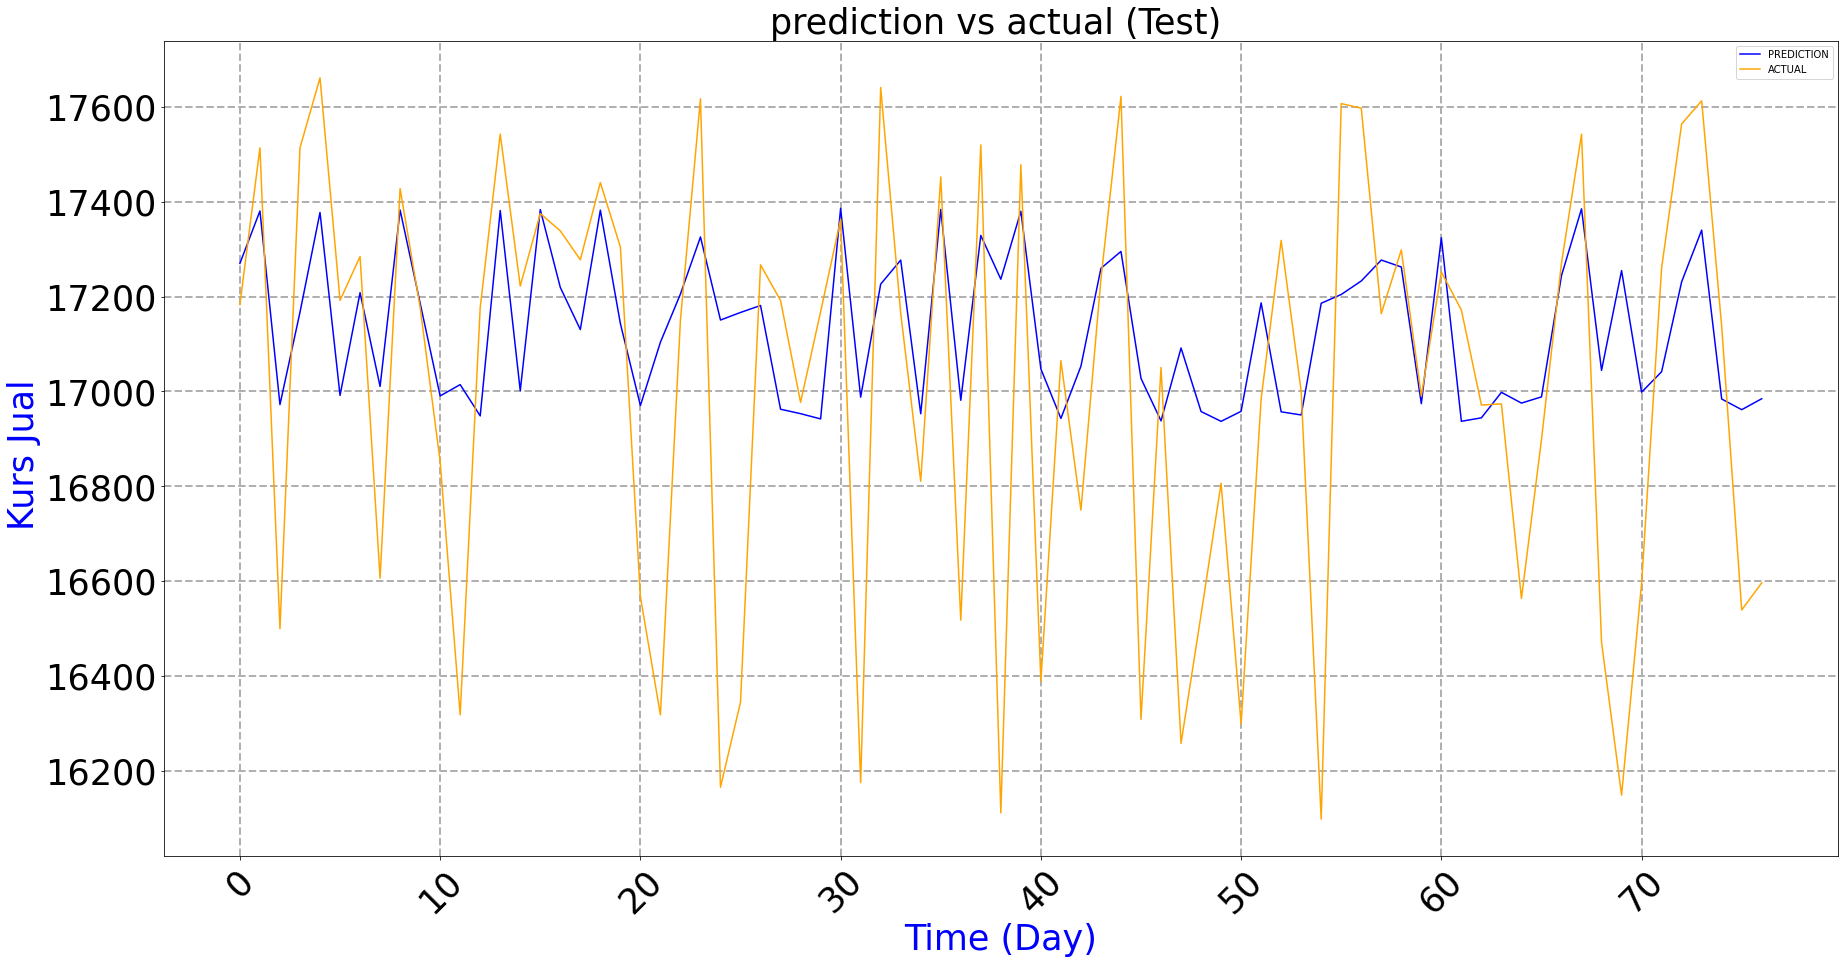

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest,label='PREDICTION', color='blue')
plt.plot(nilai_test,label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) ', fontsize= 35)
plt.ylabel('Kurs Jual ', fontsize = 35, color='blue')
plt.xlabel('Time (Day)', fontsize = 35, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=35)
plt.yticks(rotation=0, fontsize=35)
plt.grid(linestyle='--', linewidth=2)
plt.show

### Plot Prediksi VS Aktual (Dataset Kurs Jual)

In [ ]:
Prediksi_Kurs = model100_svr.predict(KursJual_scale)
print(Prediksi_Kurs)

[0.62652694 0.59550088 0.59350344 0.5682846  0.55070714 0.54931002
 0.54038034 0.54920932 0.58108104 0.60232072 0.64226171 0.62636255
 0.60464797 0.63452192 0.59356006 0.58272783 0.5956331  0.58516874
 0.60631556 0.62126366 0.63053834 0.66212187 0.70599942 0.70431368
 0.73871898 0.72710042 0.69475055 0.67214326 0.65801516 0.65801516
 0.69017016 0.72531288 0.67144571 0.6823409  0.63624619 0.60436664
 0.56030021 0.58327487 0.57497713 0.53566752 0.54090315 0.55436977
 0.5360883  0.54978195 0.56615714 0.57732071 0.57717799 0.58269145
 0.58269145 0.55700169 0.55141692 0.55829119 0.55705147 0.54629221
 0.54894716 0.56406623 0.56027531 0.58995834 0.5966811  0.63699065
 0.63832415 0.62275451 0.61454153 0.60217012 0.60217012 0.59648607
 0.60997002 0.57515087 0.54588608 0.53645303 0.53570193 0.53775215
 0.54305601 0.5699331  0.58949573 0.55628443 0.57286378 0.56862835
 0.5551477  0.55623505 0.58737406 0.57993162 0.55901969 0.57545512
 0.57744839 0.55865613 0.5442904  0.53632394 0.53626452 0.5385

In [ ]:
NilaiPrediction_Kurs = scalerX.inverse_transform(Prediksi_Kurs.reshape(-1,1))
print(NilaiPrediction_Kurs)

[[17078.9919216 ]
 [17030.3902204 ]
 [17027.26126512]
 [16987.75646538]
 [16960.22172496]
 [16958.03316195]
 [16944.04499627]
 [16957.87541361]
 [17007.80183425]
 [17041.07336479]
 [17103.64011662]
 [17078.73440485]
 [17044.71895731]
 [17091.51590275]
 [17027.34996246]
 [17010.38149785]
 [17030.59734013]
 [17014.20512034]
 [17047.33119692]
 [17070.7470966 ]
 [17085.27569589]
 [17134.75066148]
 [17203.48397468]
 [17200.8432975 ]
 [17254.7385144 ]
 [17236.53826747]
 [17185.86284628]
 [17150.44897278]
 [17128.31758803]
 [17128.31758803]
 [17178.68775981]
 [17233.73812587]
 [17149.35628099]
 [17166.42337799]
 [17094.21693875]
 [17044.27825373]
 [16975.24907248]
 [17011.23841285]
 [16998.24017706]
 [16936.66246366]
 [16944.8639633 ]
 [16965.95916503]
 [16937.321607  ]
 [16958.77242794]
 [16984.42383565]
 [17001.91134783]
 [17001.68778229]
 [17010.32450166]
 [17010.32450166]
 [16970.082013  ]
 [16961.33358386]
 [16972.1019841 ]
 [16970.15998988]
 [16953.30582433]
 [16957.46475413]
 [16981.14

<function matplotlib.pyplot.show(*args, **kw)>

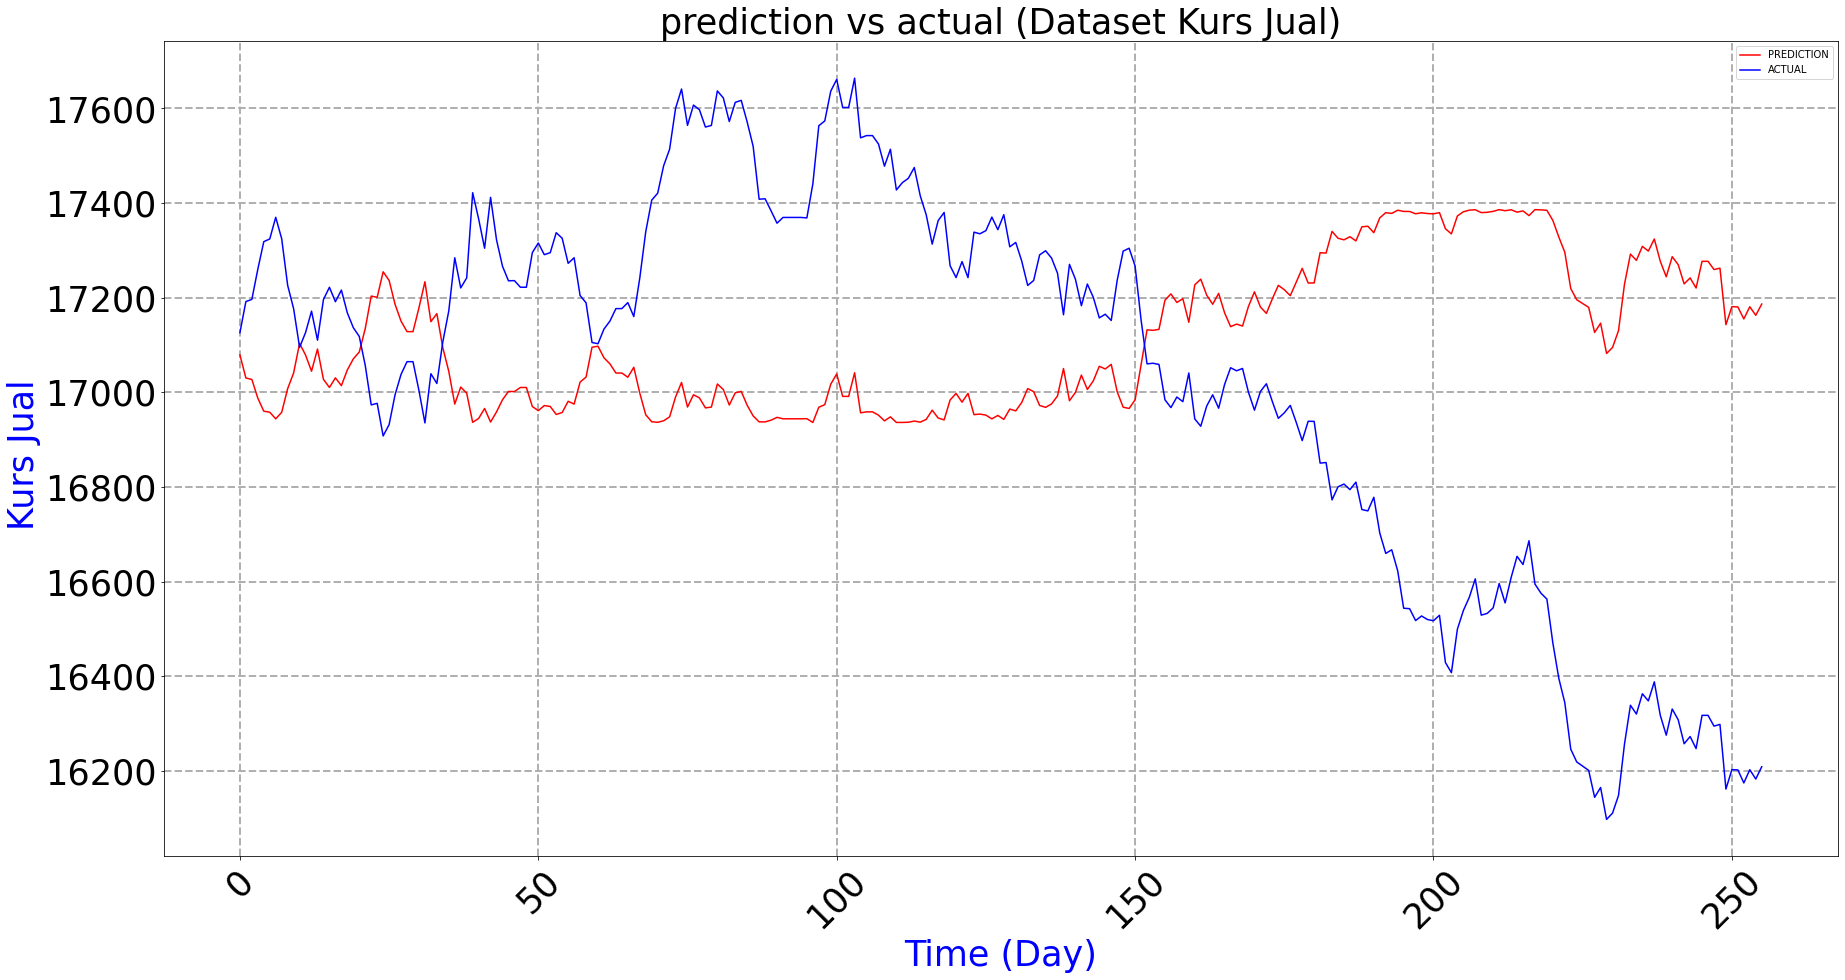

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(NilaiPrediction_Kurs,label='PREDICTION', color='red')
plt.plot(df['Kurs Jual'],label='ACTUAL', color='blue' )
plt.title('prediction vs actual (Dataset Kurs Jual)', fontsize= 35)
plt.ylabel('Kurs Jual ', fontsize = 35, color='blue')
plt.xlabel('Time (Day)', fontsize = 35, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=35)
plt.yticks(rotation=0, fontsize=35)
plt.grid(linestyle='--', linewidth=2)
plt.show

In [ ]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(KursJual_scale, Prediksi_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(KursJual_scale, Prediksi_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(KursJual_scale, Prediksi_Kurs)))

MSE  Prediksi : 0.12496
RMSE  Prediksi : 0.35349
R^2 Prediksi : -0.75389


In [ ]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Kurs_Jual, NilaiPrediction_Kurs)))

MSE  Prediksi : 306623.54288
RMSE  Prediksi : 553.73599
R^2 Prediksi : -0.75389


# Prediksi 100 hari

In [ ]:
prediction_100days = model100_svr.predict(Actual100_scale)
prediction_100days = prediction_100days.reshape(-1,1)
print(prediction_100days)

[[0.54556882]
 [0.55570877]
 [0.55080258]
 [0.59206073]
 [0.53862377]
 [0.53625366]
 [0.54686692]
 [0.5582479 ]
 [0.54509679]
 [0.5725636 ]
 [0.60254473]
 [0.59632422]
 [0.60098536]
 [0.56128987]
 [0.5436491 ]
 [0.56243156]
 [0.57347008]
 [0.55088127]
 [0.53890859]
 [0.54188211]
 [0.54740949]
 [0.53732238]
 [0.53613643]
 [0.53769793]
 [0.53766172]
 [0.54720538]
 [0.54675625]
 [0.5895047 ]
 [0.57162712]
 [0.56816476]
 [0.57522244]
 [0.56588644]
 [0.60437209]
 [0.60653075]
 [0.58570718]
 [0.64460894]
 [0.68165011]
 [0.67498206]
 [0.71311513]
 [0.77287619]
 [0.77351623]
 [0.78857875]
 [0.78302604]
 [0.78738596]
 [0.78877766]
 [0.78215447]
 [0.82044589]
 [0.82245512]
 [0.79806921]
 [0.77613132]
 [0.75701594]
 [0.7271746 ]
 [0.78198159]
 [0.77978549]
 [0.77235657]
 [0.73501019]
 [0.76536286]
 [0.72517537]
 [0.68704237]
 [0.70185489]
 [0.65847448]
 [0.7358953 ]
 [0.75066279]
 [0.75975954]
 [0.81013554]
 [0.82254899]
 [0.81458921]
 [0.76361719]
 [0.74289458]
 [0.7354524 ]
 [0.72782262]
 [0.67

In [ ]:
NilaiPrediction_100 = scalerX.inverse_transform(prediction_100days)
print(NilaiPrediction_100.reshape(-1,1))

[[16952.17263748]
 [16968.05668186]
 [16960.37122625]
 [17025.0012869 ]
 [16941.29335939]
 [16937.58063063]
 [16954.20609325]
 [16972.03416485]
 [16951.43322114]
 [16994.4594279 ]
 [17041.42426292]
 [17031.6799582 ]
 [17038.98155421]
 [16976.79935832]
 [16949.16543978]
 [16978.58778976]
 [16995.87941254]
 [16960.49449543]
 [16941.73952418]
 [16946.39747987]
 [16955.05601399]
 [16939.25475695]
 [16937.39700098]
 [16939.84304979]
 [16939.78633165]
 [16954.73629016]
 [16954.03273262]
 [17020.99732635]
 [16992.99244781]
 [16987.56872551]
 [16998.6244421 ]
 [16983.99979751]
 [17044.28678843]
 [17047.66829621]
 [17015.04857848]
 [17107.31700623]
 [17165.3412642 ]
 [17154.89590249]
 [17214.63058744]
 [17308.24509094]
 [17309.24770053]
 [17332.84284686]
 [17324.14462758]
 [17330.97435582]
 [17333.15443116]
 [17322.77933872]
 [17382.76207536]
 [17385.90950309]
 [17347.70946048]
 [17313.34419004]
 [17283.40033574]
 [17236.6544703 ]
 [17322.50852139]
 [17319.06837784]
 [17307.43112524]
 [17248.92

In [ ]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Actual100_scale, prediction_100days)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Actual100_scale, prediction_100days))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Actual100_scale, prediction_100days)))

MSE  Prediksi : 0.18567
RMSE  Prediksi : 0.43089
R^2 Prediksi : -0.96232


In [ ]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(actual_100days_array, NilaiPrediction_100)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(actual_100days_array, NilaiPrediction_100))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(actual_100days_array, NilaiPrediction_100)))

MSE  Prediksi : 534352.85136
RMSE  Prediksi : 730.99443
R^2 Prediksi : -5.19876
